In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns



from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

## Loading Data

In [2]:
survey = pd.read_csv("survey_v2.csv", index_col = 0)

In [30]:
survey.head(3)

Respondent ID  Collector ID              Start Date  \
0    11392865280     254782488  03/04/2020 02:02:23 PM   
1    11391985875     254782488  03/04/2020 09:23:12 AM   
2    11390176092     254782488  03/03/2020 07:09:15 PM   

                 End Date    IP Address  \
0  03/04/2020 02:08:09 PM  70.78.136.94   
1  03/04/2020 09:28:37 AM  174.7.248.66   
2  03/03/2020 07:14:38 PM  70.79.224.29   

  Have you heard of the Marine Mammal Rescue Centre (MMR)?  \
0                                                Yes         
1                                                Yes         
2                                                Yes         

  How did you hear about the MMR?             Other (please specify)  \
0              Vancouver Aquarium  Answered in the previous question   
1              Vancouver Aquarium  Answered in the previous question   
2              Vancouver Aquarium  Answered in the previous question   

  On a scale of 1-5 with 1 being negative and 5 being positive, how do you feel about the Marine Mammal Rescue Centre’s services?  \
0                                           Positive                                                                                
1                                           Positive                                                                                
2                                           Positive                                                                                

  Please explain why you chose your selected ranking?  ...   City/Town  \
0  I am a great supporter of the Van Aquarium and...   ...  Abbotsford   
1  It helps numerous marine mammals every year wh...   ...   Vancouver   
2          MMR does good work rehabilitating animals   ...    Richmond   

     State/Province  Country  What is your age?  \
0  British Columbia   Canada              50-64   
1                BC   Canada              50-64   
2                BC   Canada              50-64   

   What is the highest level of education achieved?  \
0                                 Bachelor’s degree   
1                       Master’s or doctoral degree   
2                       Master’s or doctoral degree   

   Do you have an affiliation to MMR?  \
0                                  No   
1                                 Yes   
2                                  No   

   Do you have an affiliation to the Vancouver Aquarium?  \
0                                              Donor       
1                                          Volunteer       
2                                          Volunteer       

   Other (please specify).4  \
0          Didn't answer it   
1          Didn't answer it   
2          Didn't answer it   

  If you would like to be entered into a random draw for two general admission passes to the Vancouver Aquarium, please share your email address:  \
0                                   Didn't answer it                                                                                                
1                         laura.childerson@gmail.com                                                                                                
2                                   Didn't answer it                                                                                                

  clusters  
0        1  
1        1  
2        1  

[3 rows x 38 columns]

## DATA ANALYSIS

In [4]:
survey.describe(include = "all")

Respondent ID  Collector ID              Start Date  \
count    1.390000e+02  1.390000e+02                     139   
unique            NaN           NaN                     139   
top               NaN           NaN  03/01/2020 03:59:25 PM   
freq              NaN           NaN                       1   
mean     1.138349e+10  2.547804e+08                     NaN   
std      2.842783e+06  1.136811e+04                     NaN   
min      1.137184e+10  2.547156e+08                     NaN   
25%      1.138252e+10  2.547825e+08                     NaN   
50%      1.138287e+10  2.547825e+08                     NaN   
75%      1.138415e+10  2.547825e+08                     NaN   
max      1.139287e+10  2.547825e+08                     NaN   

                      End Date     IP Address  \
count                      139            139   
unique                     139            108   
top     03/02/2020 07:00:24 PM  209.52.88.251   
freq                         1              8   
mean                       NaN            NaN   
std                        NaN            NaN   
min                        NaN            NaN   
25%                        NaN            NaN   
50%                        NaN            NaN   
75%                        NaN            NaN   
max                        NaN            NaN   

       Have you heard of the Marine Mammal Rescue Centre (MMR)?  \
count                                                 139         
unique                                                  2         
top                                                   Yes         
freq                                                   97         
mean                                                  NaN         
std                                                   NaN         
min                                                   NaN         
25%                                                   NaN         
50%                                                   NaN         
75%                                                   NaN         
max                                                   NaN         

       How did you hear about the MMR?             Other (please specify)  \
count                              139                                139   
unique                               7                                  5   
top                 Vancouver Aquarium  Answered in the previous question   
freq                                65                                 94   
mean                               NaN                                NaN   
std                                NaN                                NaN   
min                                NaN                                NaN   
25%                                NaN                                NaN   
50%                                NaN                                NaN   
75%                                NaN                                NaN   
max                                NaN                                NaN   

       On a scale of 1-5 with 1 being negative and 5 being positive, how do you feel about the Marine Mammal Rescue Centre’s services?  \
count                                                 139                                                                                
unique                                                  5                                                                                
top                                              Positive                                                                                
freq                                                   87                                                                                
mean                                                  NaN                                                                                
std                                                   NaN                                               

In [5]:
survey_count = survey["Have you heard of the Marine Mammal Rescue Centre (MMR)?"].value_counts(normalize = True)
survey_count.to_frame()
survey_count = survey_count.reset_index()
survey_count.columns = ["Have you heard of the Marine Mammal Rescue Centre (MMR)?", "Percentage"]

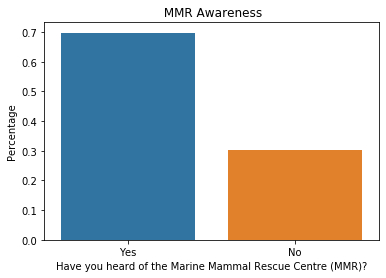

In [6]:
plt.plot()
sns.barplot(x = "Have you heard of the Marine Mammal Rescue Centre (MMR)?", y = "Percentage", data = survey_count)
plt.title(" MMR Awareness")
plt.show()

In [7]:
awareness = survey.groupby(["Have you heard of the Marine Mammal Rescue Centre (MMR)?", "clusters"]).agg(["count"])
awareness = awareness.iloc[:,0:1]
awareness = awareness.reset_index()

In [8]:
awareness.columns = ["Have you heard of the Marine Mammal Rescue Centre (MMR)?","cluster","count"]

In [26]:
awareness[ "Percentage"] = (awareness["count"]/sum(awareness["count"]))*100

In [27]:
awareness["Percentage"] = awareness["Percentage"].round(decimals = 2)

In [28]:
import plotly.express as px
fig = px.bar(awareness,x = "Have you heard of the Marine Mammal Rescue Centre (MMR)?", y = "Percentage", color = "cluster",color_continuous_scale=px.colors.sequential.Viridis, width=800, height=400)

fig.show()


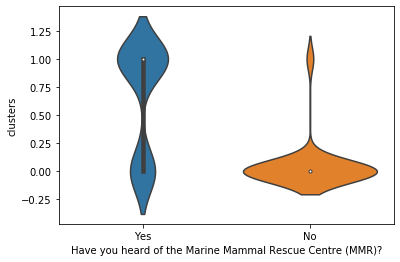

In [23]:
ax = sns.violinplot(y="clusters", x="Have you heard of the Marine Mammal Rescue Centre (MMR)?", data=survey)

In [32]:
survey.groupby(["How did you hear about the MMR?", "clusters"]).agg(["count"])

Respondent ID Collector ID  \
                                                 count        count   
How did you hear about the MMR? clusters                              
Affiliated organization         0                    1            1   
Didn't answered it              0                    1            1   
Friend                          0                   11           11   
                                1                    7            7   
Haven't heard of it             0                   40           40   
                                1                    2            2   
News                            0                    8            8   
                                1                    1            1   
Social media                    0                    2            2   
                                1                    1            1   
Vancouver Aquarium              0                    9            9   
                                1                   56           56   

                                         Start Date End Date IP Address  \
                                              count    count      count   
How did you hear about the MMR? clusters                                  
Affiliated organization         0                 1        1          1   
Didn't answered it              0                 1        1          1   
Friend                          0                11       11         11   
                                1                 7        7          7   
Haven't heard of it             0                40       40         40   
                                1                 2        2          2   
News                            0                 8        8          8   
                                1                 1        1          1   
Social media                    0                 2        2          2   
                                1                 1        1          1   
Vancouver Aquarium              0                 9        9          9   
                                1                56       56         56   

                                         Have you heard of the Marine Mammal Rescue Centre (MMR)?  \
                                                                                            count   
How did you hear about the MMR? clusters                                                            
Affiliated organization         0                                                         1         
Didn't answered it              0                                                         1         
Friend                          0                                                        11         
                                1                                                         7         
Haven't heard of it             0                                                        40         
                                1                                                         2         
News                            0                                                         8         
                                1                                                         1         
Social media                    0                                                         2         
                                1                                                         1         
Vancouver Aquarium              0                                                         9         
                                1                                                        56         

                                         Other (please specify)  \
                                                          count   
How did you hear about the MMR? clusters                          
Affiliated organization         0                             1   
Didn't answered it              0                             1  

In [36]:
cluster_1 = survey[survey["clusters"] == 1]
cluster_0 = survey[survey["clusters"] == 0]

In [38]:
cluster_1["How did you hear about the MMR?"].value_counts()

Vancouver Aquarium     56
Friend                  7
Haven't heard of it     2
News                    1
Social media            1
Name: How did you hear about the MMR?, dtype: int64

In [67]:
columns_plot = ['Have you heard of the Marine Mammal Rescue Centre (MMR)?',
       'How did you hear about the MMR?',
       'On a scale of 1-5 with 1 being negative and 5 being positive, how do you feel about the Marine Mammal Rescue Centre’s services?',
       'How confident do you feel that you know what to do when you come across a marine mammal in distress?',
       'Please state what actions you would take if you came across a marine mammal in distress. (Rank your choices with 1 being the best).  Feed the mammal shellfish',
       'Don’t do anything, let nature take its course',
       'Call MMR, the Vancouver Aquarium, or a local rehabilitation centre',
       'Take it home and care for it', 'Keep people and pets away',
       'Take the mammal to the nearest veterinary clinic',
       'Have you donated to a charity in the past year?',
       'Can you share why you donated to that specific charity/cause?',
       'How did you find out about that specific charity/cause?',
       'Other (please specify).2', 'How do you prefer to make your donations?',
       'Other (please specify).3',
       'Have you considered donating money to the Marine Mammal Rescue Center?',
       'Have you considered donating money to ocean health and conservation causes?',
       'City/Town', 'State/Province', 'Country', 'What is your age?',
       'What is the highest level of education achieved?',
       'Do you have an affiliation to MMR?',
       'Do you have an affiliation to the Vancouver Aquarium?',
       'Other (please specify).4']

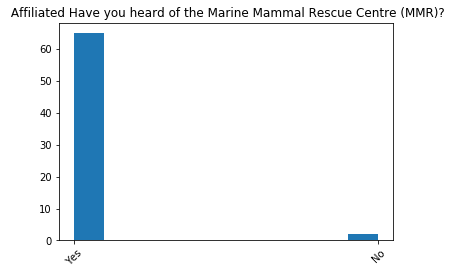

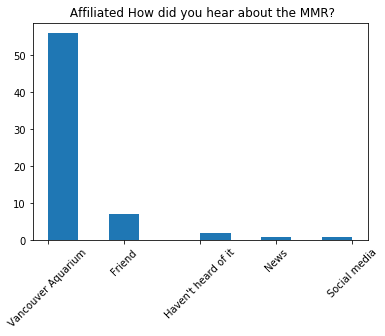

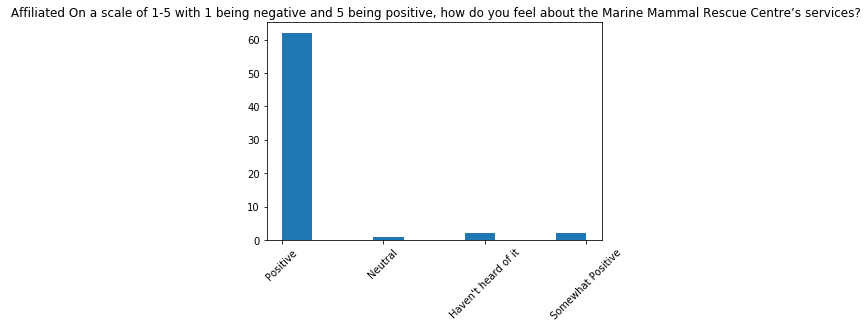

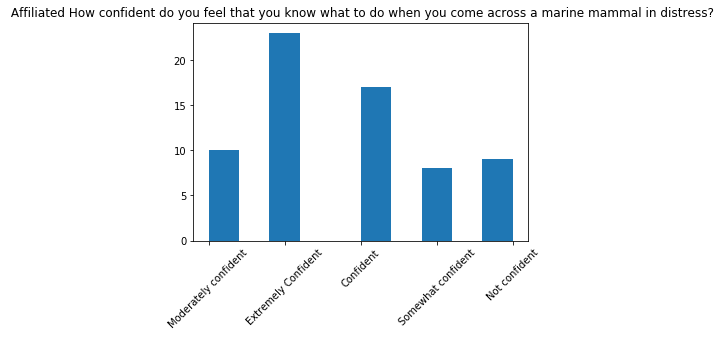

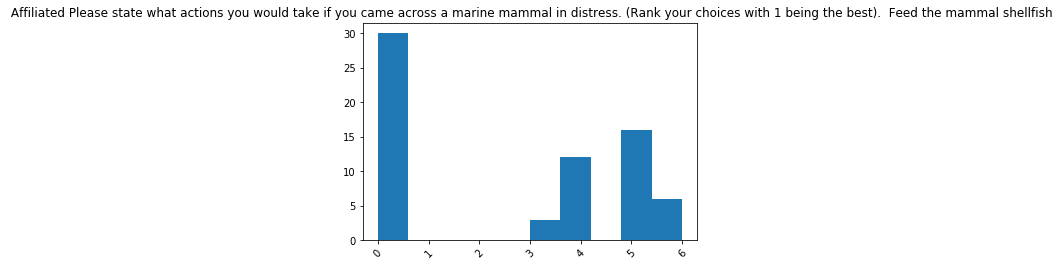

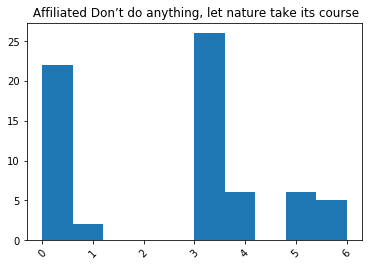

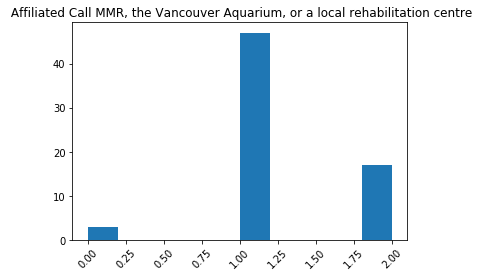

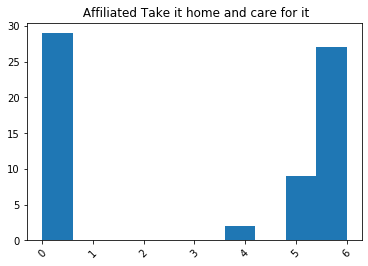

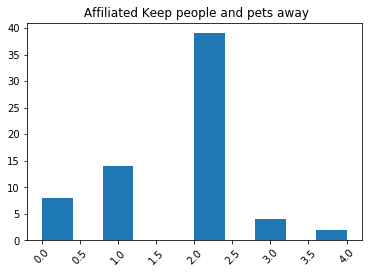

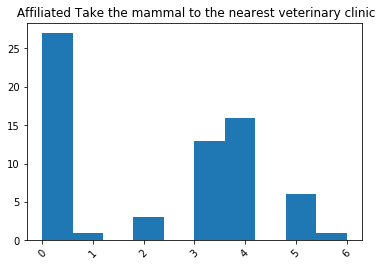

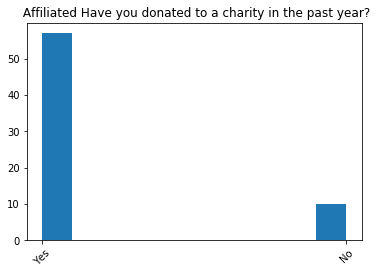

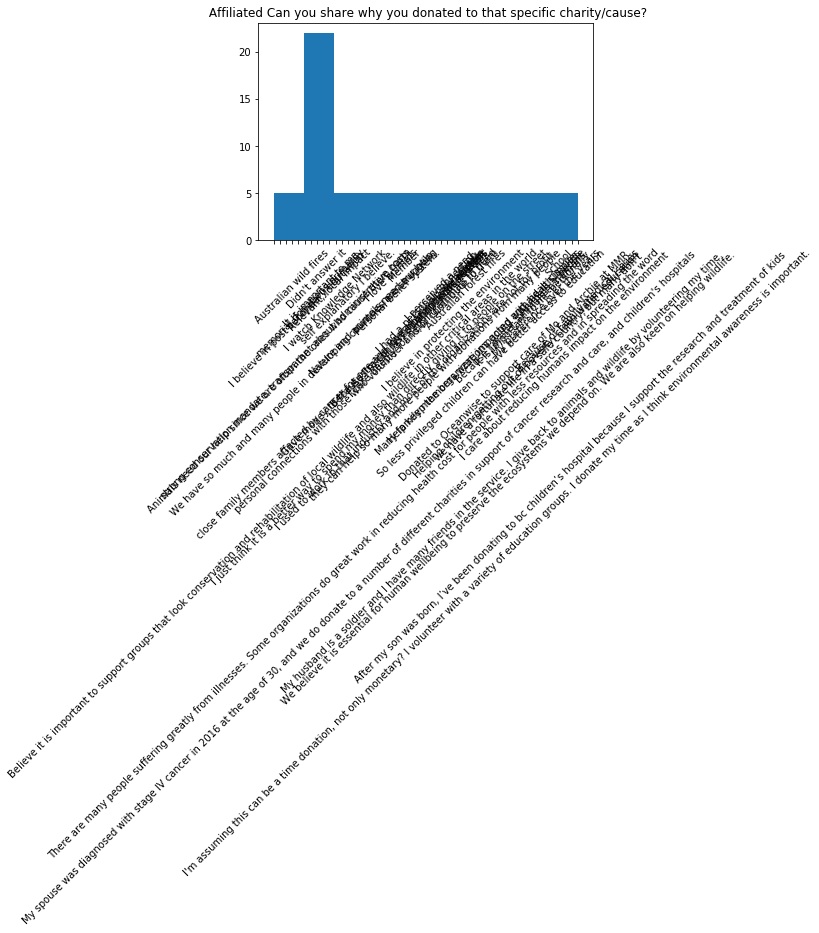

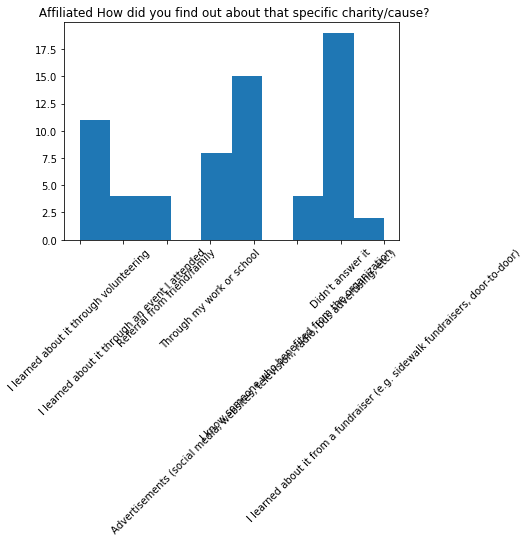

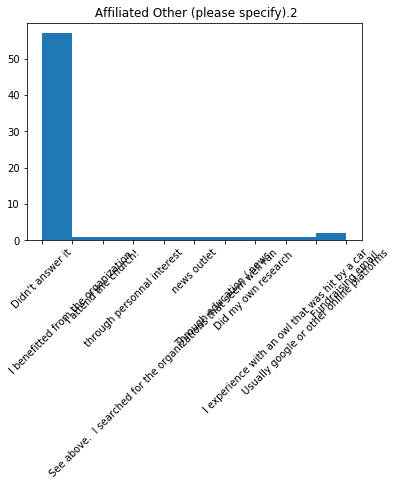

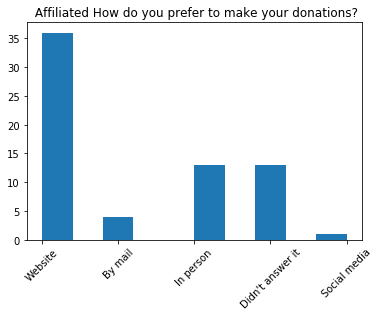

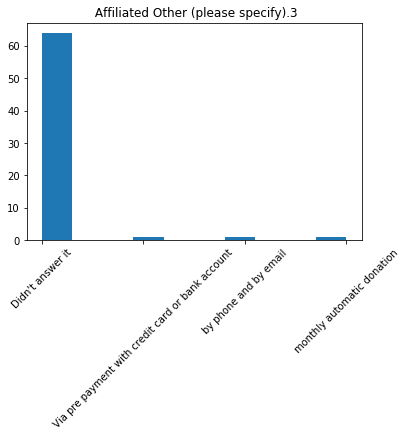

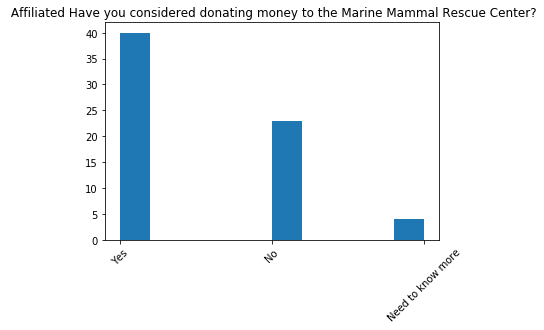

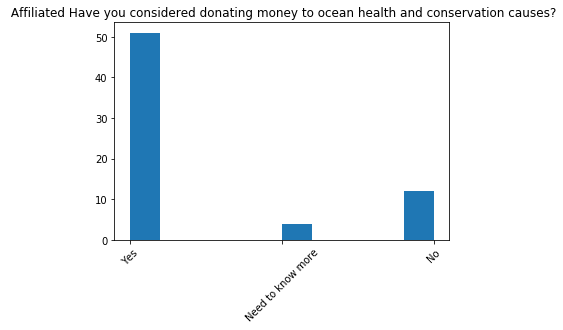

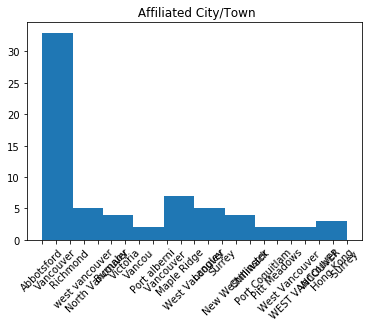

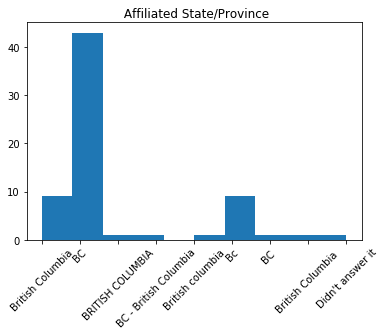

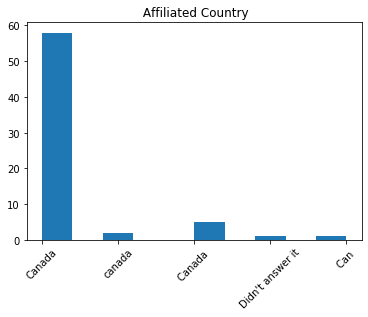

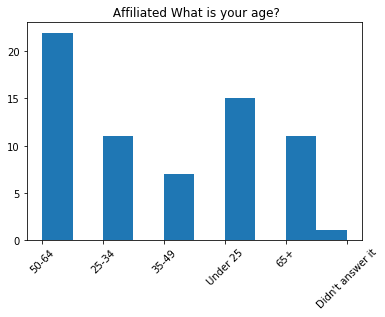

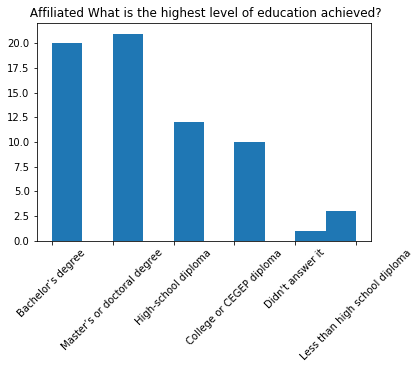

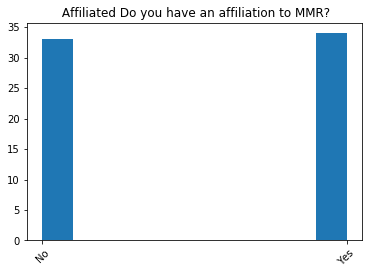

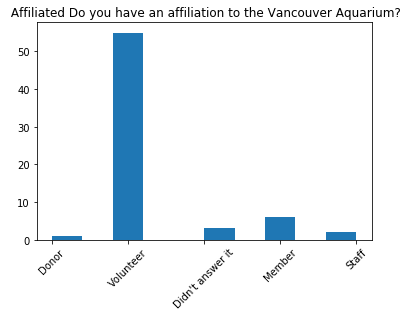

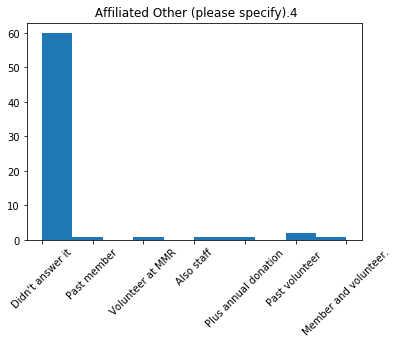

In [80]:

for col in columns_plot:
    plt.plot()
    plt.hist(cluster_1[col])
    plt.title(f' Affiliated {col}')
    plt.xticks(rotation = 45)
    plt.show()
    

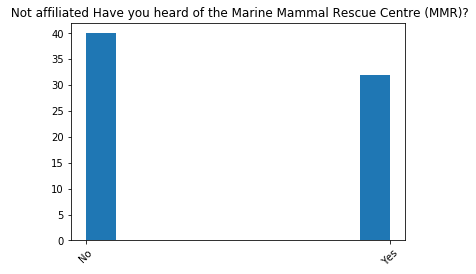

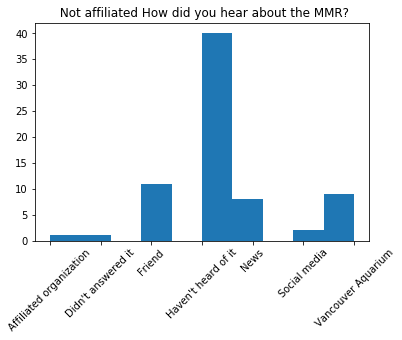

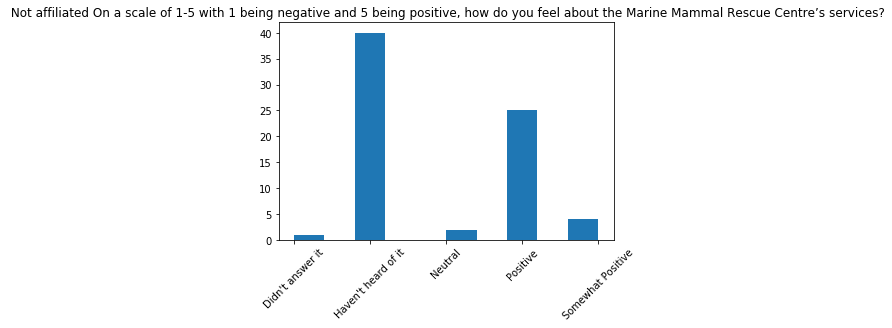

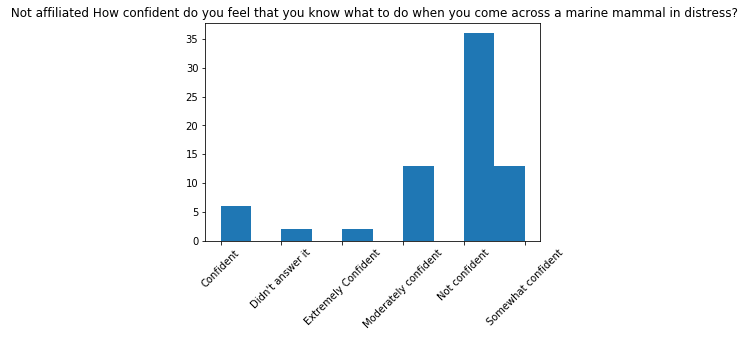

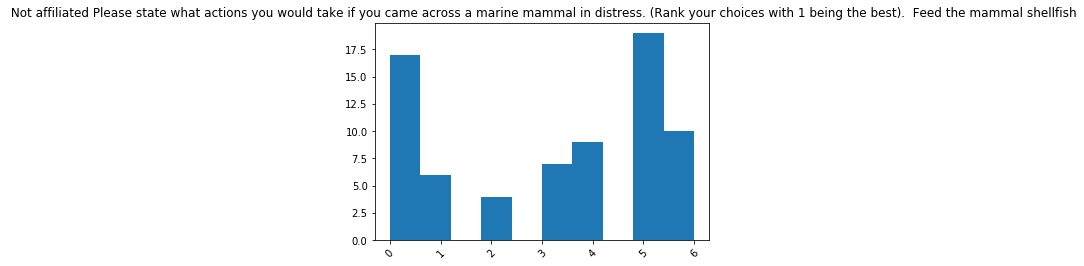

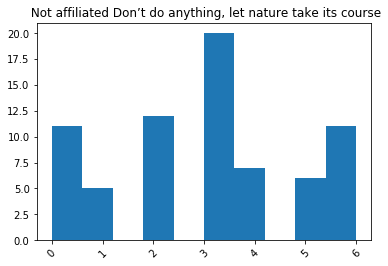

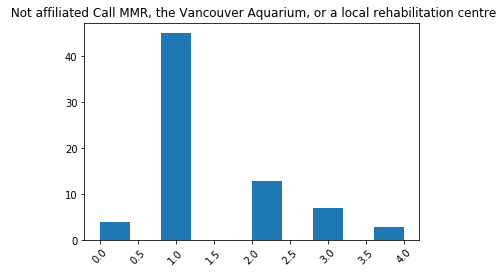

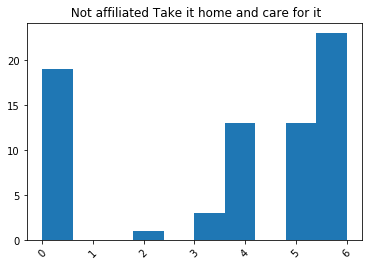

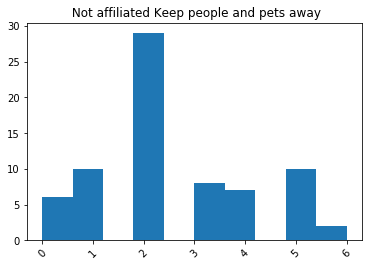

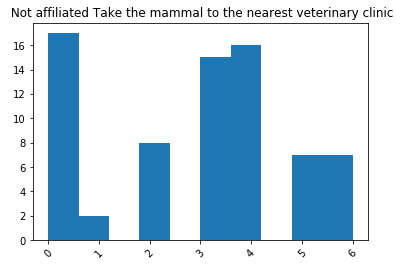

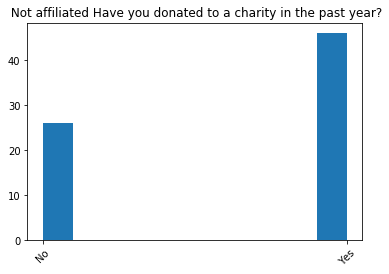

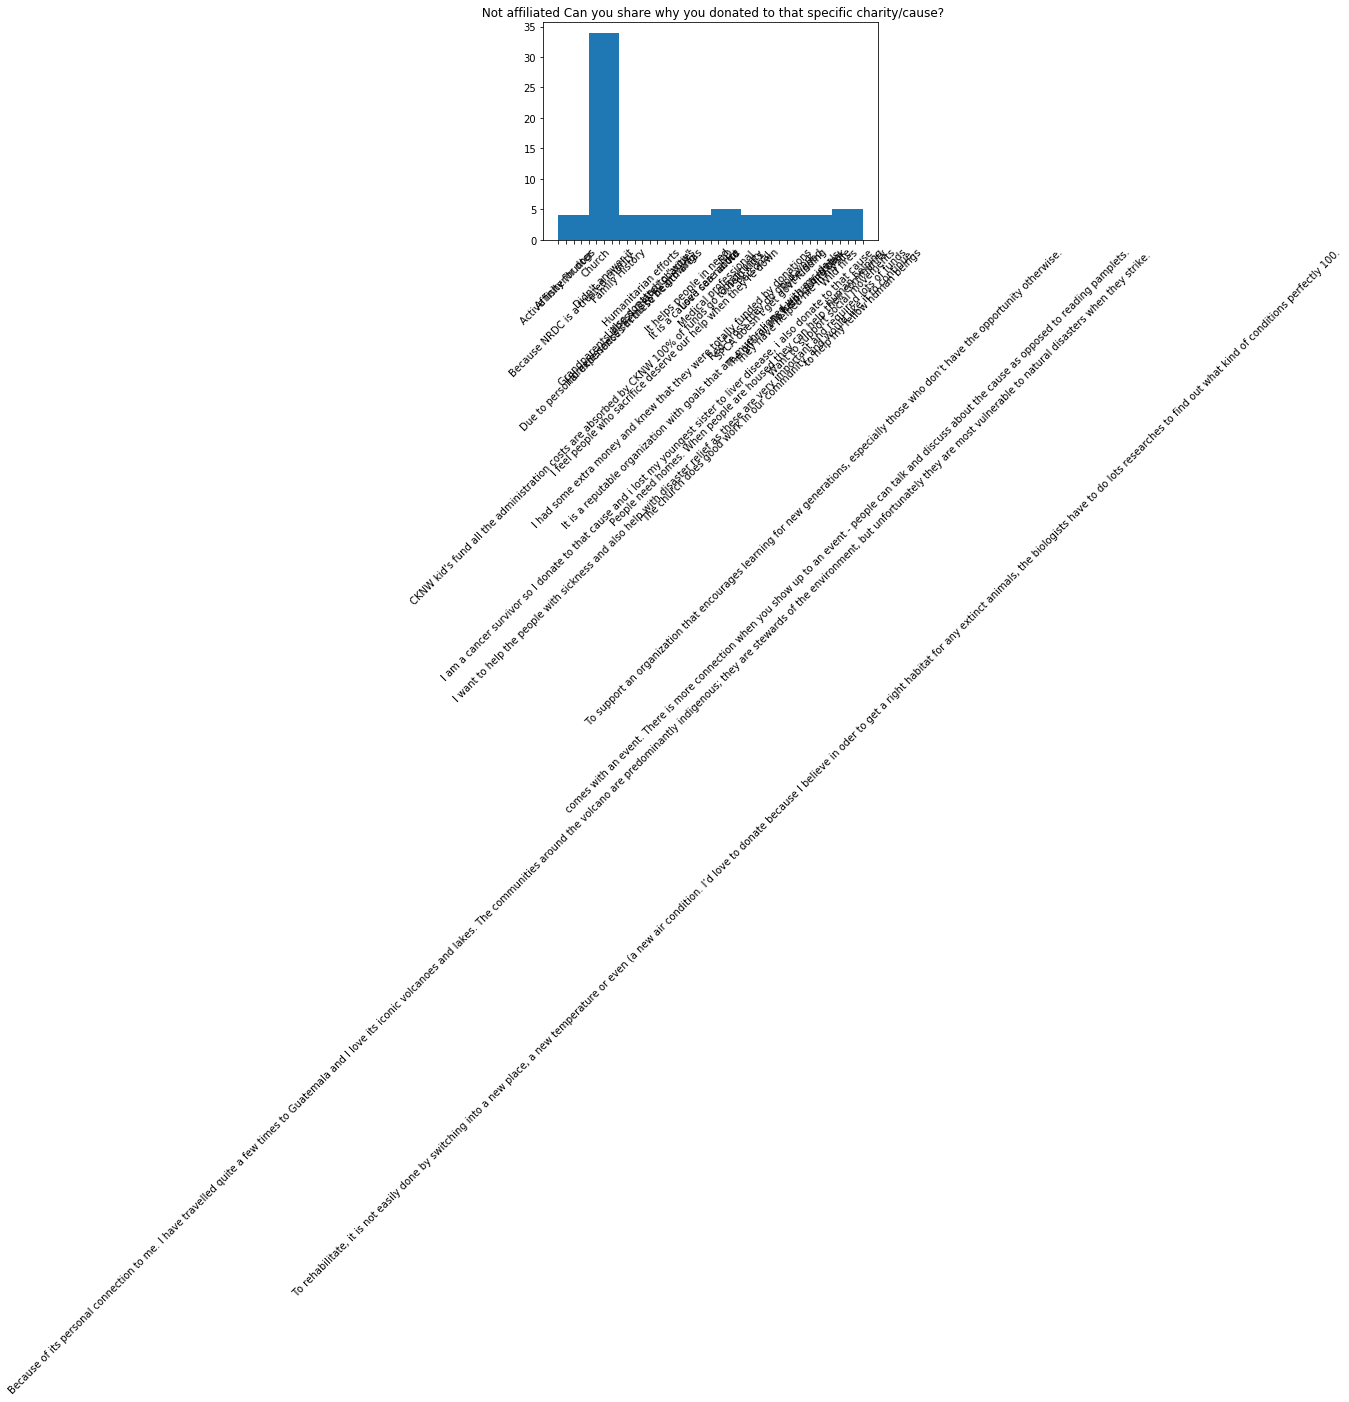

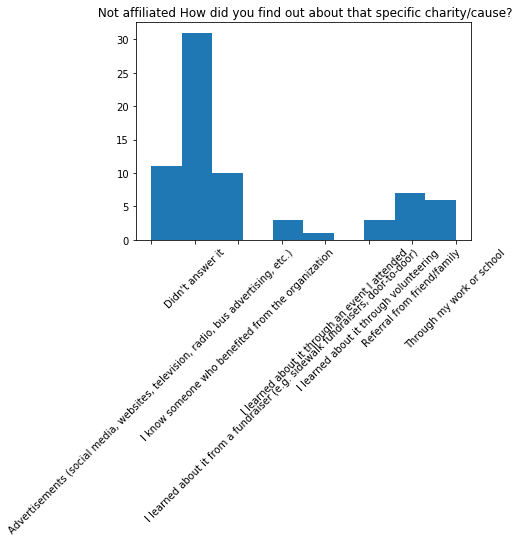

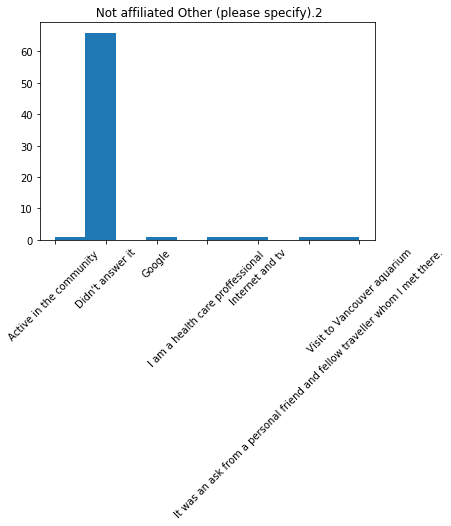

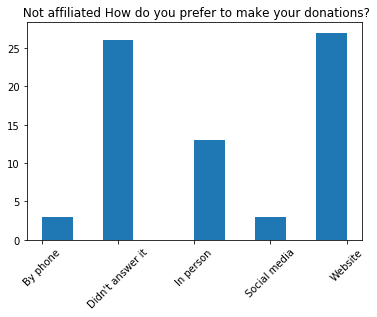

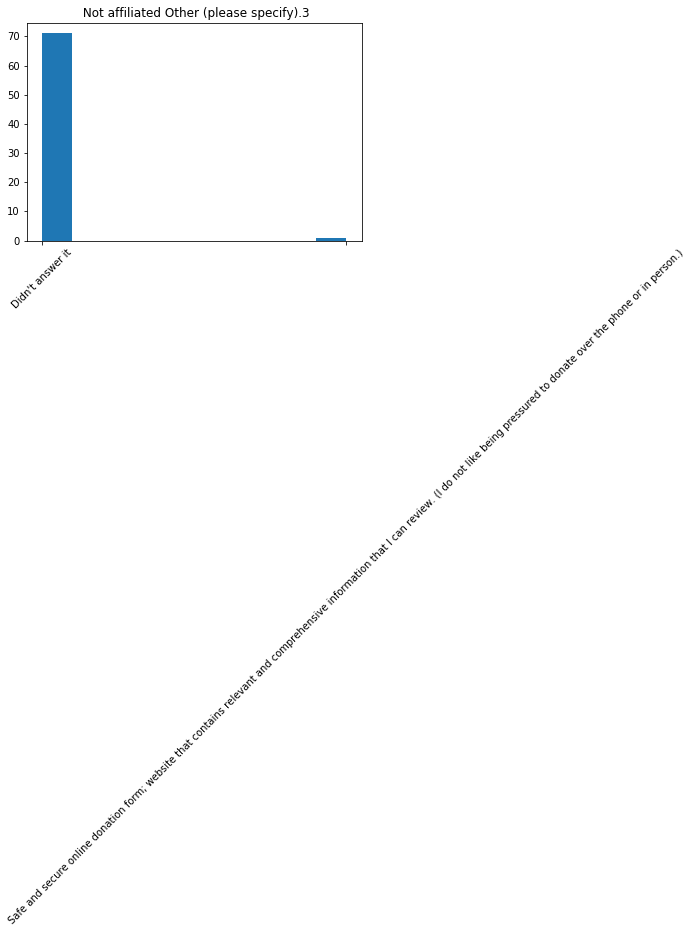

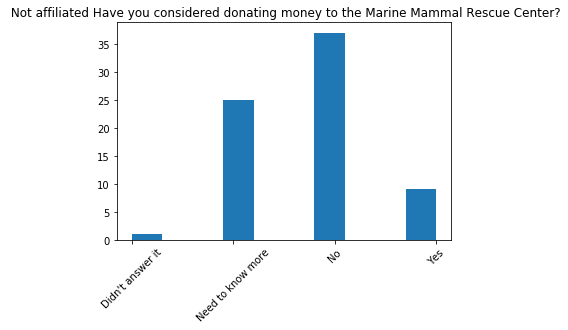

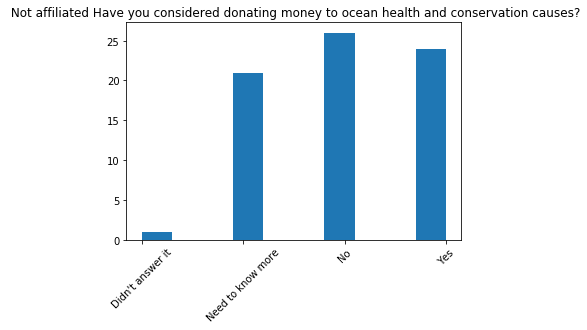

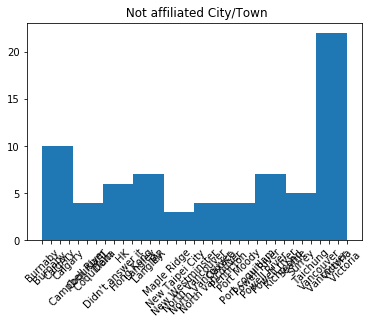

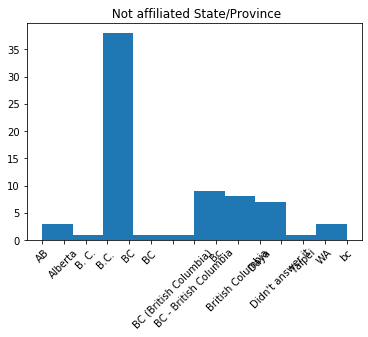

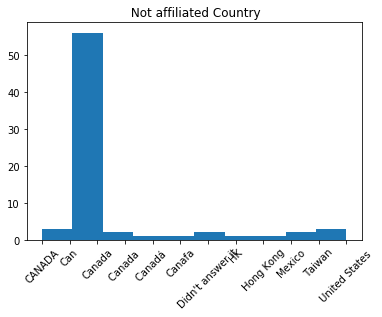

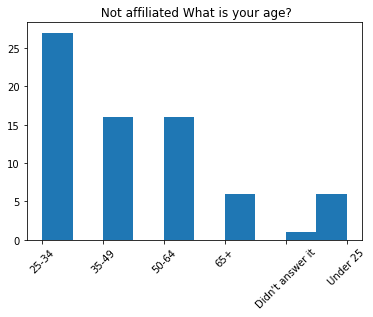

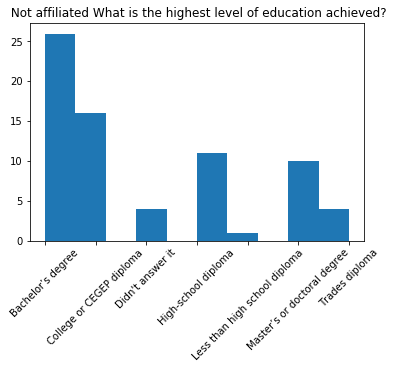

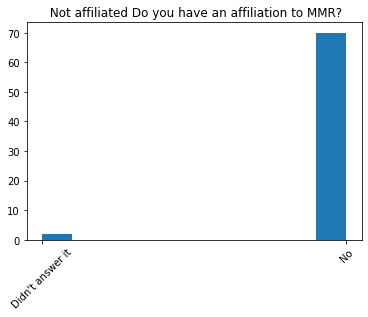

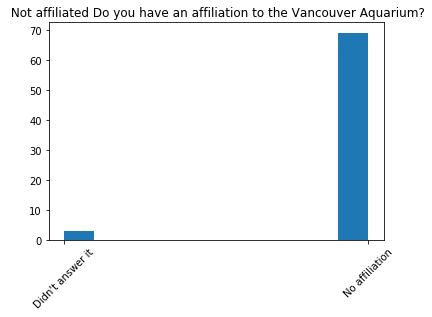

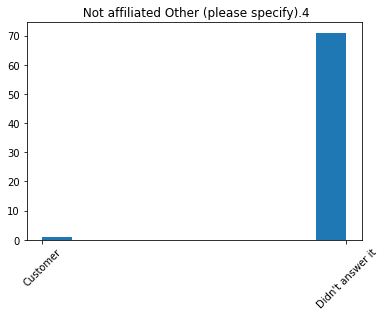

In [83]:
for col in columns_plot:
    plt.plot()
    plt.hist(cluster_0[col].sort_values())
    plt.title(f' Not affiliated {col}')
    plt.xticks(rotation = 45)
    plt.show()
    

In [73]:
columns = cluster_1.columns
for col in columns:
    display(cluster_1[col].value_counts(normalize = True))

11383417214    0.014925
11382844067    0.014925
11383961915    0.014925
11382746808    0.014925
11382785849    0.014925
                 ...   
11383834566    0.014925
11382534215    0.014925
11386266564    0.014925
11383446236    0.014925
11392865280    0.014925
Name: Respondent ID, Length: 67, dtype: float64

254782488    0.985075
254715558    0.014925
Name: Collector ID, dtype: float64

03/01/2020 03:59:25 PM    0.014925
03/01/2020 09:00:56 AM    0.014925
02/29/2020 09:06:51 PM    0.014925
02/29/2020 09:00:14 PM    0.014925
02/29/2020 08:39:28 PM    0.014925
                            ...   
03/01/2020 09:02:46 AM    0.014925
02/29/2020 06:40:30 PM    0.014925
02/29/2020 10:53:16 PM    0.014925
03/01/2020 08:22:20 PM    0.014925
03/02/2020 10:52:31 AM    0.014925
Name: Start Date, Length: 67, dtype: float64

02/29/2020 09:54:59 PM    0.014925
03/02/2020 05:47:53 PM    0.014925
02/29/2020 06:02:49 PM    0.014925
03/03/2020 07:14:38 PM    0.014925
02/29/2020 06:45:27 PM    0.014925
                            ...   
03/01/2020 05:06:12 PM    0.014925
02/29/2020 06:15:12 PM    0.014925
02/29/2020 06:06:39 PM    0.014925
02/29/2020 01:07:29 PM    0.014925
03/01/2020 09:07:51 AM    0.014925
Name: End Date, Length: 67, dtype: float64

173.180.3.1       0.029851
24.85.127.122     0.029851
208.98.223.72     0.029851
137.82.216.1      0.014925
23.16.93.35       0.014925
                    ...   
70.79.179.19      0.014925
23.16.21.77       0.014925
99.199.28.215     0.014925
216.71.204.202    0.014925
45.44.121.29      0.014925
Name: IP Address, Length: 64, dtype: float64

Yes    0.970149
No     0.029851
Name: Have you heard of the Marine Mammal Rescue Centre (MMR)?, dtype: float64

Vancouver Aquarium     0.835821
Friend                 0.104478
Haven't heard of it    0.029851
News                   0.014925
Social media           0.014925
Name: How did you hear about the MMR?, dtype: float64

Answered in the previous question    0.955224
Haven't heard of it                  0.029851
I am a volunteer there.              0.014925
Name: Other (please specify), dtype: float64

Positive               0.925373
Haven't heard of it    0.029851
Somewhat Positive      0.029851
Neutral                0.014925
Name: On a scale of 1-5 with 1 being negative and 5 being positive, how do you feel about the Marine Mammal Rescue Centre’s services?, dtype: float64

Didn't answer it                                                                                                                                                                                                                                                                                                                                                  0.074627
I volunteer there                                                                                                                                                                                                                                                                                                                                                 0.029851
Haven't heard of it                                                                                                                                                                                                                                                               

Didn't answer it                                                                                                                  0.059701
Emaciated, visibly injured animals, animals trapped in fishing nets                                                               0.014925
emaciated, entangled, or injured                                                                                                  0.014925
Could be many things....like an orca or other cetacean caught in a fishing net.                                                   0.014925
An animal which has been trapped in a net                                                                                         0.014925
                                                                                                                                    ...   
Visibly injured, emaciated, encircled by plastic strapping                                                                        0.014925
Visibly been hurt (blood, i

Extremely Confident     0.343284
Confident               0.253731
Moderately confident    0.149254
Not confident           0.134328
Somewhat confident      0.119403
Name: How confident do you feel that you know what to do when you come across a marine mammal in distress?, dtype: float64

0    0.447761
5    0.238806
4    0.179104
6    0.089552
3    0.044776
Name: Please state what actions you would take if you came across a marine mammal in distress. (Rank your choices with 1 being the best).  Feed the mammal shellfish, dtype: float64

3    0.388060
0    0.328358
5    0.089552
4    0.089552
6    0.074627
1    0.029851
Name: Don’t do anything, let nature take its course, dtype: float64

1    0.701493
2    0.253731
0    0.044776
Name: Call MMR, the Vancouver Aquarium, or a local rehabilitation centre, dtype: float64

0    0.432836
6    0.402985
5    0.134328
4    0.029851
Name: Take it home and care for it, dtype: float64

2    0.582090
1    0.208955
0    0.119403
3    0.059701
4    0.029851
Name: Keep people and pets away, dtype: float64

0    0.402985
4    0.238806
3    0.194030
5    0.089552
2    0.044776
6    0.014925
1    0.014925
Name: Take the mammal to the nearest veterinary clinic, dtype: float64

Yes    0.850746
No     0.149254
Name: Have you donated to a charity in the past year?, dtype: float64

Wildlife conservation and rehabilitation              0.283582
Didn't answer it                                      0.223881
Health                                                0.164179
International (i.e. disaster relief, human rights)    0.104478
Education                                             0.059701
Environmental                                         0.044776
Homelessness                                          0.044776
Domestic animal                                       0.029851
Arts & culture                                        0.029851
Veterans                                              0.014925
Name: What type of charity/cause have you most frequently donated to in the past year? , dtype: float64

Didn't answer it                                                     0.865672
Dress for Success; Vancouver Aquarium; local community foundation    0.014925
Sport                                                                0.014925
CBC, assoc that helps abused women,                                  0.014925
several of the above choices                                         0.014925
Disabled                                                             0.014925
Religious                                                            0.014925
church                                                               0.014925
Church                                                               0.014925
religious organization                                               0.014925
Name: Other (please specify).1, dtype: float64

Didn't answer it                                                                                                                                                                                0.268657
After my son was born, I’ve been donating to bc children’s hospital because I support the research and treatment of kids                                                                        0.014925
Animals need our help since we are often the ones who cause them harm                                                                                                                           0.014925
My husband is a soldier and I have many friends in the service. I give back to animals and wildlife by volunteering my time.                                                                    0.014925
self explanatory I believe.                                                                                                                                                                     0.01

Didn't answer it                                                                     0.283582
Advertisements (social media, websites, television, radio, bus advertising, etc.)    0.223881
I learned about it through volunteering                                              0.164179
Through my work or school                                                            0.119403
I learned about it through an event I attended                                       0.059701
I know someone who benefited from the organization                                   0.059701
Referral from friend/family                                                          0.059701
I learned about it from a fundraiser (e.g. sidewalk fundraisers, door-to-door)       0.029851
Name: How did you find out about that specific charity/cause?, dtype: float64

Didn't answer it                                                   0.850746
I attend the church!                                               0.014925
Usually google or other online platforms                           0.014925
See above.  I searched for the organizations that seem well run    0.014925
Did my own research                                                0.014925
Fundraising email.                                                 0.014925
news outlet                                                        0.014925
I benefitted from the organization                                 0.014925
Through education / news.                                          0.014925
I experience with an owl that was hit by a car                     0.014925
through personnal interest                                         0.014925
Name: Other (please specify).2, dtype: float64

Website             0.537313
Didn't answer it    0.194030
In person           0.194030
By mail             0.059701
Social media        0.014925
Name: How do you prefer to make your donations?, dtype: float64

Didn't answer it                                    0.955224
by phone and by email                               0.014925
Via pre payment with credit card or bank account    0.014925
monthly automatic donation                          0.014925
Name: Other (please specify).3, dtype: float64

Yes                  0.597015
No                   0.343284
Need to know more    0.059701
Name: Have you considered donating money to the Marine Mammal Rescue Center?, dtype: float64

Yes                  0.761194
No                   0.179104
Need to know more    0.059701
Name: Have you considered donating money to ocean health and conservation causes?, dtype: float64

Vancouver          0.417910
Vancouver          0.074627
North Vancouver    0.059701
Richmond           0.059701
New Westminster    0.044776
Burnaby            0.044776
Surrey             0.029851
West Vancouver     0.029851
Maple Ridge        0.029851
Port Coquitlam     0.014925
Chilliwack         0.014925
Vancou             0.014925
Langley            0.014925
Abbotsford         0.014925
Surrey             0.014925
WEST VANCOUVER     0.014925
Port alberni       0.014925
Hong Kong          0.014925
Pitt Meadows       0.014925
West Vancouver     0.014925
vancouver          0.014925
Victoria           0.014925
west vancouver     0.014925
Name: City/Town, dtype: float64

BC                       0.641791
Bc                       0.134328
British Columbia         0.134328
BRITISH COLUMBIA         0.014925
British Columbia         0.014925
BC - British Columbia    0.014925
BC                       0.014925
Didn't answer it         0.014925
British columbia         0.014925
Name: State/Province, dtype: float64

Canada              0.865672
Canada              0.074627
canada              0.029851
Can                 0.014925
Didn't answer it    0.014925
Name: Country, dtype: float64

50-64               0.328358
Under 25            0.223881
25-34               0.164179
65+                 0.164179
35-49               0.104478
Didn't answer it    0.014925
Name: What is your age?, dtype: float64

Master’s or doctoral degree      0.313433
Bachelor’s degree                0.298507
High-school diploma              0.179104
College or CEGEP diploma         0.149254
Less than high school diploma    0.044776
Didn't answer it                 0.014925
Name: What is the highest level of education achieved?, dtype: float64

Yes    0.507463
No     0.492537
Name: Do you have an affiliation to MMR?, dtype: float64

Volunteer           0.820896
Member              0.089552
Didn't answer it    0.044776
Staff               0.029851
Donor               0.014925
Name: Do you have an affiliation to the Vancouver Aquarium?, dtype: float64

Didn't answer it         0.895522
Past volunteer           0.029851
Past member              0.014925
Volunteer at MMR         0.014925
Plus annual donation     0.014925
Member and volunteer.    0.014925
Also staff               0.014925
Name: Other (please specify).4, dtype: float64

Didn't answer it               0.552239
mms@telus.net                  0.029851
cheunglisa@hotmail.com         0.014925
taja.klos@hotmail.com          0.014925
di4bill@telus.net              0.014925
Rhennessey2003@hotmail.com     0.014925
ifalloften1@gmail.com          0.014925
kchakhnov@gmail.com            0.014925
kmariajean@hotmail.com         0.014925
rachelxgreig@gmail.com         0.014925
michellewang1071@gmail.com     0.014925
moirarowan@gmail.com           0.014925
cat.slave399@gmail.com         0.014925
nicolesherlock778@gmail.com    0.014925
laura.childerson@gmail.com     0.014925
estherlevyh@hotmail.com        0.014925
gbremer@langara.ca             0.014925
hermissenda@gmail.com          0.014925
ninie_14@hotmail.com           0.014925
leanne.bernaerdt@ubc.ca        0.014925
Amandao@live.ca                0.014925
leahbalfour@hotmail.com        0.014925
Piadewdney@gmail.com           0.014925
Mcdermottmirhady@gmail.com     0.014925
Sunweipop@gmail.com            0.014925


1    1.0
Name: clusters, dtype: float64

In [76]:
columns = cluster_0.columns
for col in columns:
    display(cluster_0[col].value_counts(normalize = True))

11385475646    0.013889
11381003901    0.013889
11382449900    0.013889
11386000418    0.013889
11382477348    0.013889
                 ...   
11384097112    0.013889
11382473434    0.013889
11387204829    0.013889
11382463976    0.013889
11383972225    0.013889
Name: Respondent ID, Length: 72, dtype: float64

254782488    0.944444
254715558    0.041667
254759612    0.013889
Name: Collector ID, dtype: float64

02/29/2020 02:07:12 PM    0.013889
02/29/2020 02:05:52 PM    0.013889
03/02/2020 10:46:46 PM    0.013889
03/03/2020 04:45:10 PM    0.013889
03/02/2020 09:55:57 AM    0.013889
                            ...   
03/01/2020 09:35:37 PM    0.013889
02/29/2020 01:28:42 PM    0.013889
02/29/2020 01:14:09 PM    0.013889
02/29/2020 02:29:40 PM    0.013889
03/01/2020 05:07:47 PM    0.013889
Name: Start Date, Length: 72, dtype: float64

03/01/2020 09:50:38 PM    0.013889
02/29/2020 02:01:22 PM    0.013889
03/01/2020 09:35:55 AM    0.013889
02/29/2020 06:09:04 PM    0.013889
02/29/2020 01:17:45 PM    0.013889
                            ...   
02/29/2020 02:03:35 PM    0.013889
02/29/2020 08:30:37 PM    0.013889
02/29/2020 02:09:08 PM    0.013889
03/03/2020 12:10:40 PM    0.013889
02/28/2020 06:36:11 PM    0.013889
Name: End Date, Length: 72, dtype: float64

209.52.88.251      0.111111
208.98.223.72      0.069444
137.82.216.1       0.041667
24.114.44.11       0.041667
24.114.25.201      0.041667
173.180.3.1        0.027778
24.114.37.253      0.027778
198.202.137.34     0.027778
24.114.24.215      0.027778
24.114.36.163      0.027778
50.92.59.15        0.013889
50.64.38.82        0.013889
69.172.169.226     0.013889
96.49.200.74       0.013889
174.7.109.131      0.013889
70.79.56.242       0.013889
70.79.142.150      0.013889
45.33.137.82       0.013889
198.202.137.24     0.013889
24.85.126.28       0.013889
142.179.76.95      0.013889
24.108.66.222      0.013889
50.98.206.246      0.013889
208.98.204.218     0.013889
96.50.77.255       0.013889
96.50.245.204      0.013889
50.68.171.165      0.013889
154.5.164.145      0.013889
207.216.192.192    0.013889
96.48.237.252      0.013889
209.121.151.72     0.013889
209.121.168.211    0.013889
165.225.38.23      0.013889
209.53.73.201      0.013889
72.143.223.66      0.013889
104.129.194.107    0

No     0.555556
Yes    0.444444
Name: Have you heard of the Marine Mammal Rescue Centre (MMR)?, dtype: float64

Haven't heard of it        0.555556
Friend                     0.152778
Vancouver Aquarium         0.125000
News                       0.111111
Social media               0.027778
Didn't answered it         0.013889
Affiliated organization    0.013889
Name: How did you hear about the MMR?, dtype: float64

Haven't heard of it                  0.555556
Answered in the previous question    0.416667
Bamfield marine science center       0.013889
Daughter                             0.013889
Name: Other (please specify), dtype: float64

Haven't heard of it    0.555556
Positive               0.347222
Somewhat Positive      0.055556
Neutral                0.027778
Didn't answer it       0.013889
Name: On a scale of 1-5 with 1 being negative and 5 being positive, how do you feel about the Marine Mammal Rescue Centre’s services?, dtype: float64

Haven't heard of it                                                                                                                                                                                                                                  0.555556
Didn't answer it                                                                                                                                                                                                                                     0.027778
Ocean saving initiatives are necessary                                                                                                                                                                                                               0.013889
unsure about their services                                                                                                                                                                                                                   

Didn't answer it                                                                                                                  0.069444
Not sure                                                                                                                          0.027778
Don't know                                                                                                                        0.027778
Near people                                                                                                                       0.027778
Don't know- I would think weak swimming, movement impeded by fishing lines or other plastic, not running away when it should.     0.013889
                                                                                                                                    ...   
An animal acting different than its normal behavior                                                                               0.013889
A place that save marine ma

Not confident           0.500000
Somewhat confident      0.180556
Moderately confident    0.180556
Confident               0.083333
Extremely Confident     0.027778
Didn't answer it        0.027778
Name: How confident do you feel that you know what to do when you come across a marine mammal in distress?, dtype: float64

5    0.263889
0    0.236111
6    0.138889
4    0.125000
3    0.097222
1    0.083333
2    0.055556
Name: Please state what actions you would take if you came across a marine mammal in distress. (Rank your choices with 1 being the best).  Feed the mammal shellfish, dtype: float64

3    0.277778
2    0.166667
6    0.152778
0    0.152778
4    0.097222
5    0.083333
1    0.069444
Name: Don’t do anything, let nature take its course, dtype: float64

1    0.625000
2    0.180556
3    0.097222
0    0.055556
4    0.041667
Name: Call MMR, the Vancouver Aquarium, or a local rehabilitation centre, dtype: float64

6    0.319444
0    0.263889
5    0.180556
4    0.180556
3    0.041667
2    0.013889
Name: Take it home and care for it, dtype: float64

2    0.402778
5    0.138889
1    0.138889
3    0.111111
4    0.097222
0    0.083333
6    0.027778
Name: Keep people and pets away, dtype: float64

0    0.236111
4    0.222222
3    0.208333
2    0.111111
6    0.097222
5    0.097222
1    0.027778
Name: Take the mammal to the nearest veterinary clinic, dtype: float64

Yes    0.638889
No     0.361111
Name: Have you donated to a charity in the past year?, dtype: float64

Didn't answer it                                      0.375000
International (i.e. disaster relief, human rights)    0.125000
Health                                                0.111111
Wildlife conservation and rehabilitation              0.069444
Homelessness                                          0.069444
Education                                             0.069444
Domestic animal                                       0.055556
Environmental                                         0.041667
Youth                                                 0.041667
Indigenous communities                                0.013889
Veterans                                              0.013889
Arts & culture                                        0.013889
Name: What type of charity/cause have you most frequently donated to in the past year? , dtype: float64

Didn't answer it                                                                                                    0.958333
Church                                                                                                              0.013889
Volcanic eruption and earthquake in Guatemala, relief for the indigenous communities affected around the volcano    0.013889
any charity galas                                                                                                   0.013889
Name: Other (please specify).1, dtype: float64

Didn't answer it                                                                                                                                                                                                                                                                                                                  0.430556
No                                                                                                                                                                                                                                                                                                                                0.027778
Because NRDC is a trusted charity                                                                                                                                                                                                                                                                                                 0.013889
Church 

Didn't answer it                                                                     0.430556
Advertisements (social media, websites, television, radio, bus advertising, etc.)    0.152778
I know someone who benefited from the organization                                   0.138889
Referral from friend/family                                                          0.097222
Through my work or school                                                            0.083333
I learned about it from a fundraiser (e.g. sidewalk fundraisers, door-to-door)       0.041667
I learned about it through volunteering                                              0.041667
I learned about it through an event I attended                                       0.013889
Name: How did you find out about that specific charity/cause?, dtype: float64

Didn't answer it                                                               0.916667
Visit to Vancouver aquarium                                                    0.013889
Active in the community                                                        0.013889
Google                                                                         0.013889
I am a health care proffessional                                               0.013889
It was an ask from a personal friend and fellow traveller whom I met there.    0.013889
Internet and tv                                                                0.013889
Name: Other (please specify).2, dtype: float64

Website             0.375000
Didn't answer it    0.361111
In person           0.180556
By phone            0.041667
Social media        0.041667
Name: How do you prefer to make your donations?, dtype: float64

Didn't answer it                                                                                                                                                                                0.986111
Safe and secure online donation form; website that contains relevant and comprehensive information that I can review. (I do not like being pressured to donate over the phone or in person.)    0.013889
Name: Other (please specify).3, dtype: float64

No                   0.513889
Need to know more    0.347222
Yes                  0.125000
Didn't answer it     0.013889
Name: Have you considered donating money to the Marine Mammal Rescue Center?, dtype: float64

No                   0.361111
Yes                  0.333333
Need to know more    0.291667
Didn't answer it     0.013889
Name: Have you considered donating money to ocean health and conservation causes?, dtype: float64

Vancouver           0.194444
Burnaby             0.083333
Vancouver           0.083333
Langley             0.069444
Didn't answer it    0.041667
Surrey              0.041667
Richmond            0.041667
Calgary             0.027778
Coquitlam           0.027778
Powell River        0.027778
Port Moody          0.027778
Delta               0.013889
Powell river        0.013889
MR                  0.013889
Campbell River      0.013889
Burnaby             0.013889
Port coquitlam      0.013889
Coquitlam           0.013889
Seattle             0.013889
New Taipei City     0.013889
New Westminster     0.013889
Taichung            0.013889
Hong Kong           0.013889
Victoria            0.013889
North vancouver     0.013889
CalgAry             0.013889
Oaxaca              0.013889
Penticton           0.013889
HK                  0.013889
Powell River        0.013889
Victoria            0.013889
North Vancouver     0.013889
Langley             0.013889
North Vancouver     0.013889
Maple Ridge   

BC                       0.513889
British Columbia         0.111111
Bc                       0.111111
Didn't answer it         0.083333
bc                       0.027778
Alberta                  0.027778
BC                       0.013889
B. C.                    0.013889
BC - British Columbia    0.013889
WA                       0.013889
AB                       0.013889
Daya                     0.013889
Taipei                   0.013889
B.C.                     0.013889
BC (British Columbia)    0.013889
Name: State/Province, dtype: float64

Canada              0.777778
Can                 0.027778
Mexico              0.027778
Canada              0.027778
Taiwan              0.027778
Didn't answer it    0.027778
Canafa              0.013889
Canadá              0.013889
HK                  0.013889
CANADA              0.013889
Hong Kong           0.013889
United States       0.013889
Name: Country, dtype: float64

25-34               0.375000
50-64               0.222222
35-49               0.222222
65+                 0.083333
Under 25            0.083333
Didn't answer it    0.013889
Name: What is your age?, dtype: float64

Bachelor’s degree                0.361111
College or CEGEP diploma         0.222222
High-school diploma              0.152778
Master’s or doctoral degree      0.138889
Didn't answer it                 0.055556
Trades diploma                   0.055556
Less than high school diploma    0.013889
Name: What is the highest level of education achieved?, dtype: float64

No                  0.972222
Didn't answer it    0.027778
Name: Do you have an affiliation to MMR?, dtype: float64

No affiliation      0.958333
Didn't answer it    0.041667
Name: Do you have an affiliation to the Vancouver Aquarium?, dtype: float64

Didn't answer it    0.986111
Customer            0.013889
Name: Other (please specify).4, dtype: float64

Didn't answer it                0.541667
Donaldsmith@telus.net           0.027778
stephen_lee_94@hotmail.com      0.013889
Carmamo@yahoo.com               0.013889
sor.snowie@gmail.com            0.013889
Gueri22@hotmail.com             0.013889
Lim.laetitia@gmail.com          0.013889
theyinofyang@gmail.com          0.013889
andreaszesi@gmail.com           0.013889
jiggles_wiggles@hotmail.com     0.013889
Brandonc123@gmail.com           0.013889
a.r.alizadegan@gmail.com        0.013889
tcarto67@gmail.com              0.013889
She199492@yahoo.com.tw          0.013889
Derekparkin33@gmail.com         0.013889
eleristaiger@gmail.com          0.013889
axniewolf@gmail.com             0.013889
Cherryfancyshadow@gmail.com     0.013889
tlcevent@hotmail.com            0.013889
thakorjayati7@gmail.com         0.013889
Serenityinla@gmail.com          0.013889
amanda.l.w.85@gmail.com         0.013889
natalie.lim28@gmail.com         0.013889
Ryanlucier1@gmail.com           0.013889
David.sheen@zoho

0    1.0
Name: clusters, dtype: float64

## TEXT ANALYSIS

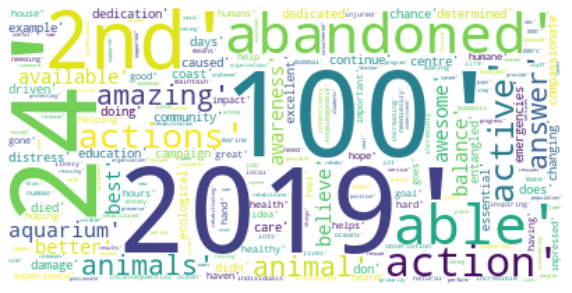

1


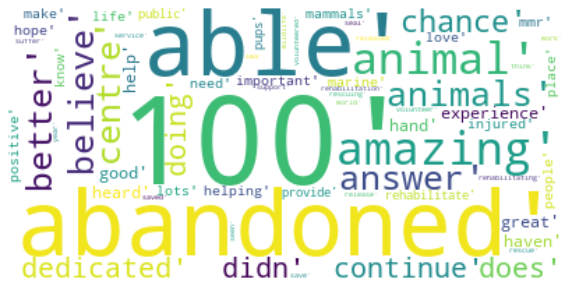

2


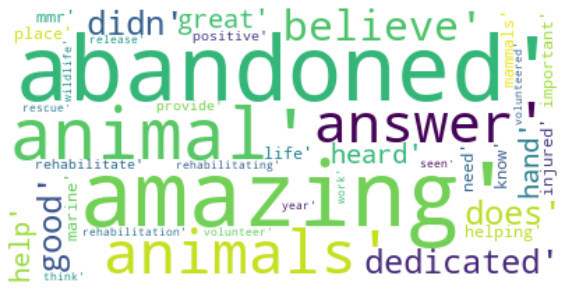

3


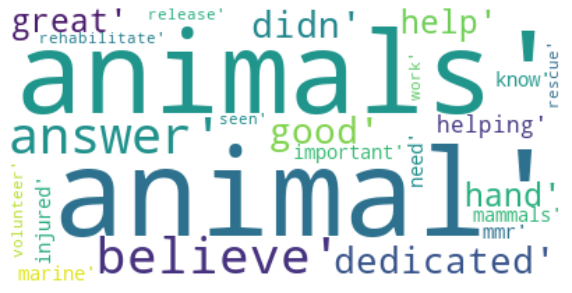

4


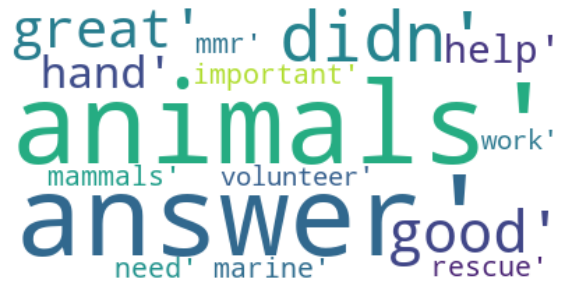

5


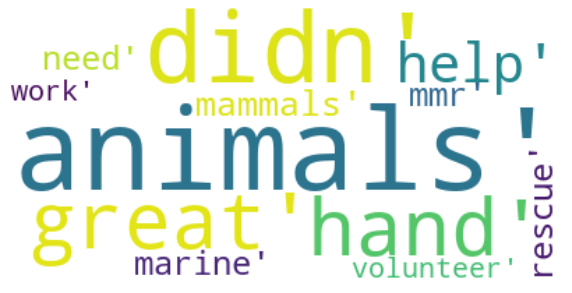

6


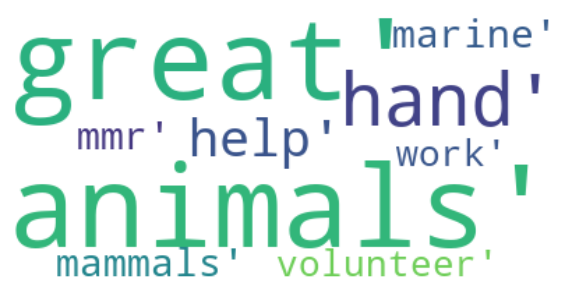

7


In [91]:
words = cluster_1[["Respondent ID","Please explain why you chose your selected ranking?"]].copy()

from sklearn.feature_extraction.text import TfidfVectorizer

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

for i in np.arange(1,8,1):
    reviews = words["Please explain why you chose your selected ranking?"]
    tfidf = TfidfVectorizer(min_df= i,stop_words="english").fit(reviews)
    data_positive = tfidf.transform(reviews)
    my_df2 = pd.DataFrame(columns=tfidf.get_feature_names(), data=data_positive.toarray())
    text = tfidf.get_feature_names()
    wordcloud = WordCloud(background_color="white").generate(str(text))
    plt.figure(figsize = (10.0,8.0))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()
    print(i)

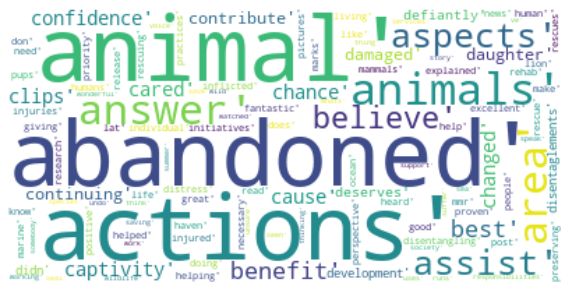

1


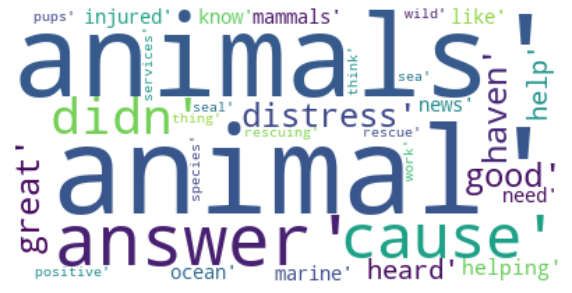

2


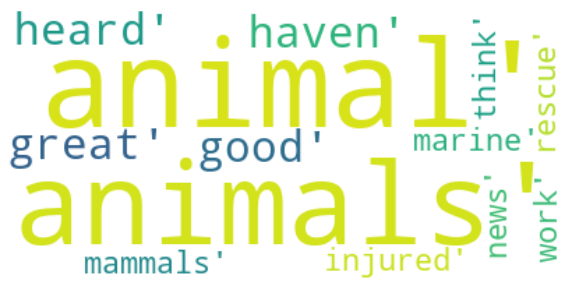

3


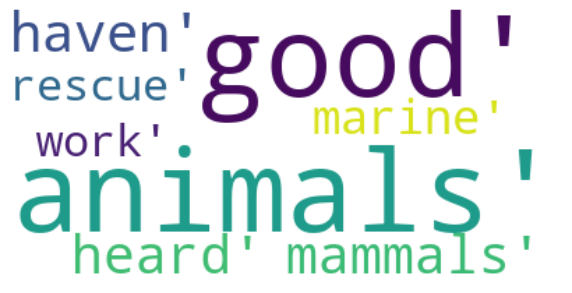

4


In [90]:
words_0 = cluster_0[["Respondent ID","Please explain why you chose your selected ranking?"]].copy()

from sklearn.feature_extraction.text import TfidfVectorizer

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

for i in np.arange(1,5,1):
    reviews_0 = words_0["Please explain why you chose your selected ranking?"]
    tfidf_0 = TfidfVectorizer(min_df= i,stop_words="english").fit(reviews_0)
    data_0 = tfidf_0.transform(reviews_0)
    my_df3 = pd.DataFrame(columns=tfidf_0.get_feature_names(), data=data_0.toarray())
    text_0 = tfidf_0.get_feature_names()
    wordcloud_0 = WordCloud(background_color="white").generate(str(text_0))
    plt.figure(figsize = (10.0,8.0))
    plt.imshow(wordcloud_0, interpolation="bilinear")
    plt.axis("off")
    plt.show()
    print(i)

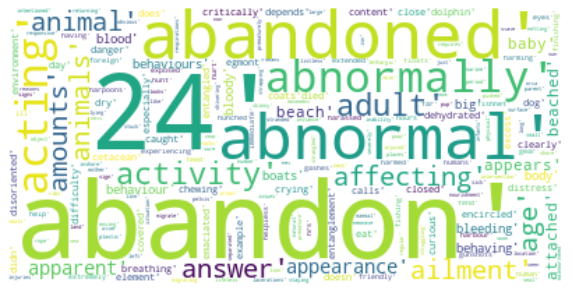

1


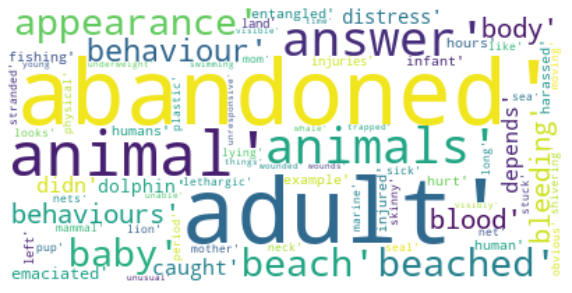

2


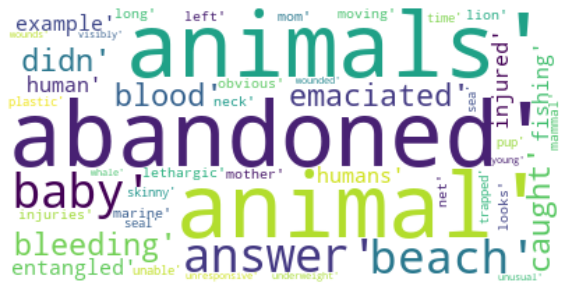

3


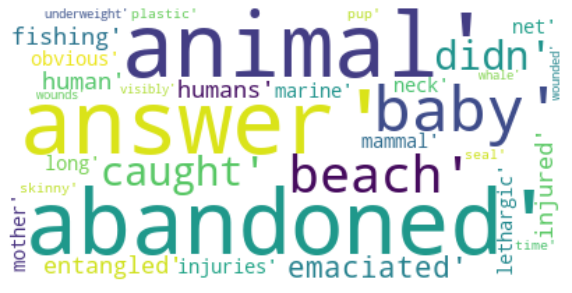

4


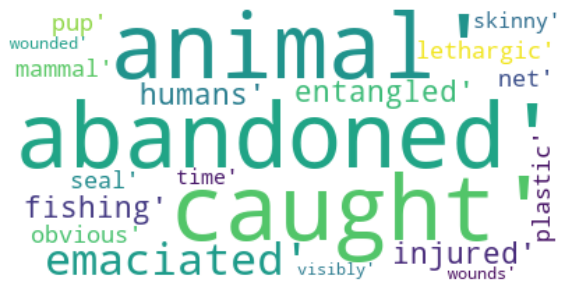

5


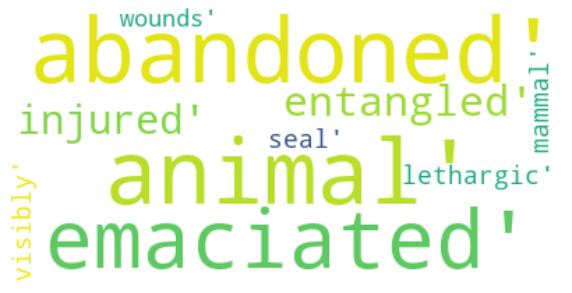

6


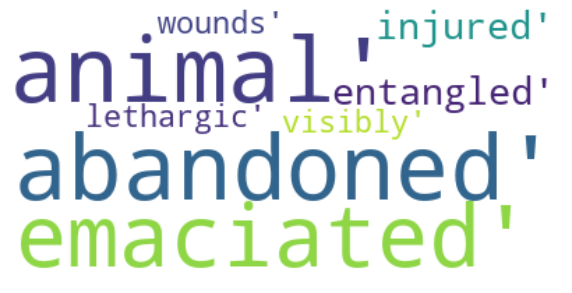

7


In [93]:
for i in np.arange(1,8,1):
    reviews = cluster_1["Please describe what a marine mammal in distress looks like to you?"]
    tfidf = TfidfVectorizer(min_df= i,stop_words="english").fit(reviews)
    data_positive = tfidf.transform(reviews)
    my_df2 = pd.DataFrame(columns=tfidf.get_feature_names(), data=data_positive.toarray())
    text = tfidf.get_feature_names()
    wordcloud = WordCloud(background_color="white").generate(str(text))
    plt.figure(figsize = (10.0,8.0))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()
    print(i)

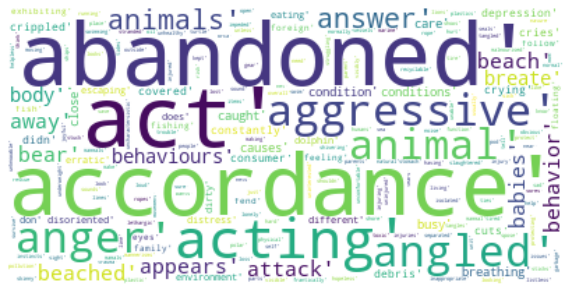

1


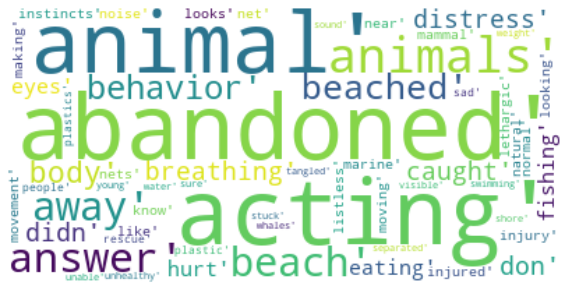

2


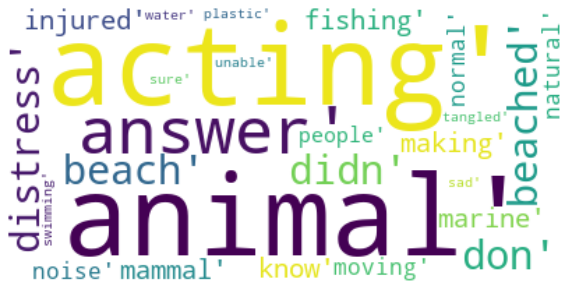

3


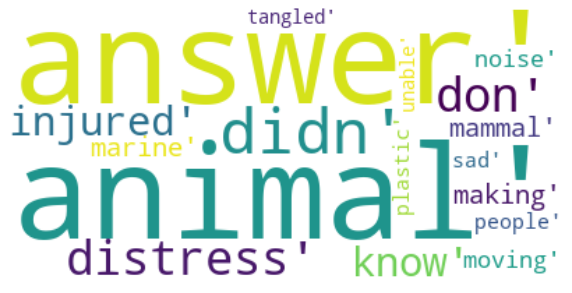

4


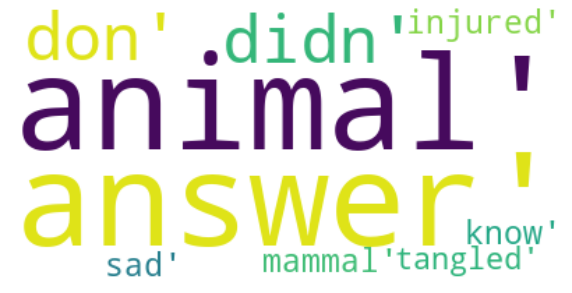

5


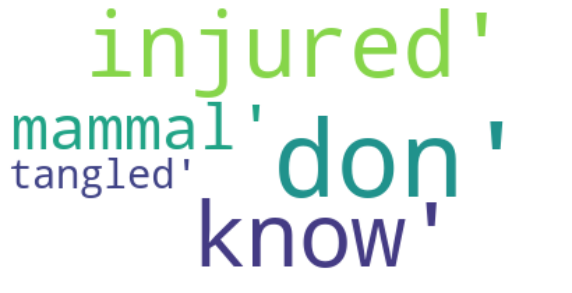

6


ValueError: After pruning, no terms remain. Try a lower min_df or a higher max_df.

In [94]:
for i in np.arange(1,8,1):
    reviews = cluster_0["Please describe what a marine mammal in distress looks like to you?"]
    tfidf = TfidfVectorizer(min_df= i,stop_words="english").fit(reviews)
    data_positive = tfidf.transform(reviews)
    my_df2 = pd.DataFrame(columns=tfidf.get_feature_names(), data=data_positive.toarray())
    text = tfidf.get_feature_names()
    wordcloud = WordCloud(background_color="white").generate(str(text))
    plt.figure(figsize = (10.0,8.0))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()
    print(i)

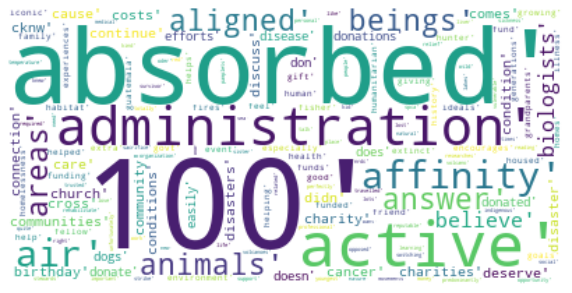

1


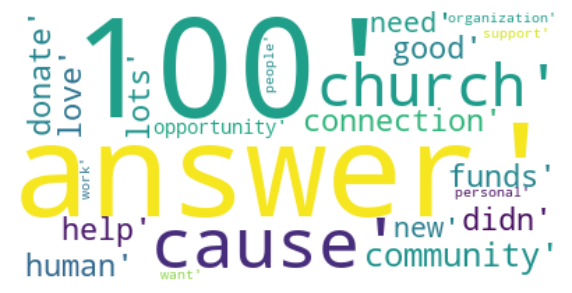

2


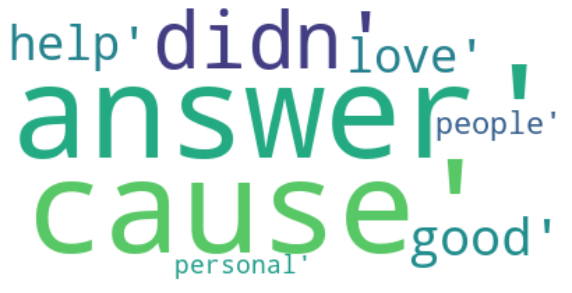

3


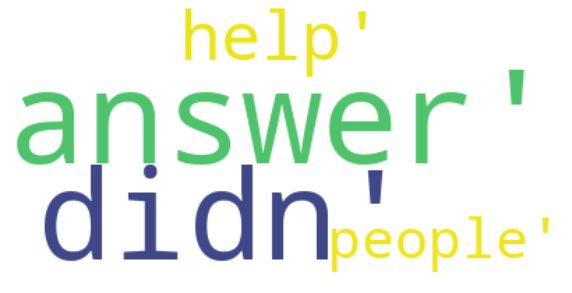

4


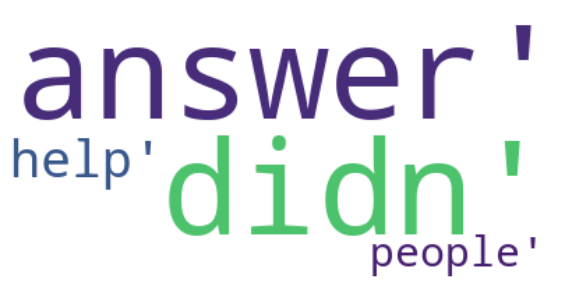

5


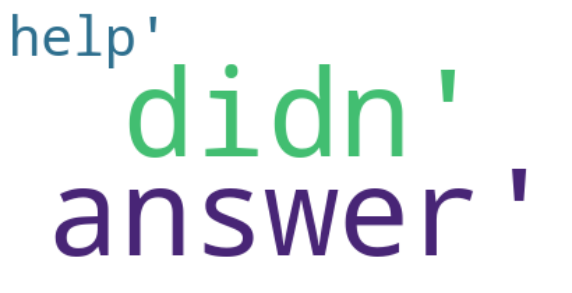

6


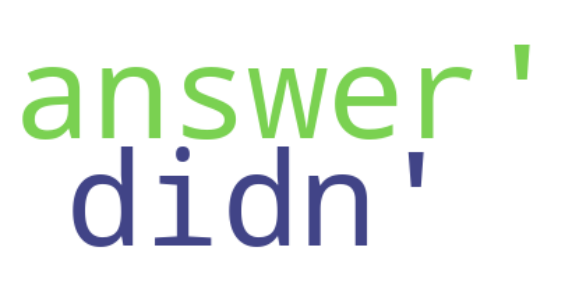

7


In [96]:
for i in np.arange(1,8,1):
    reviews = cluster_0["Can you share why you donated to that specific charity/cause?"]
    tfidf = TfidfVectorizer(min_df= i,stop_words="english").fit(reviews)
    data_positive = tfidf.transform(reviews)
    my_df2 = pd.DataFrame(columns=tfidf.get_feature_names(), data=data_positive.toarray())
    text = tfidf.get_feature_names()
    wordcloud = WordCloud(background_color="white").generate(str(text))
    plt.figure(figsize = (10.0,8.0))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()
    print(i)

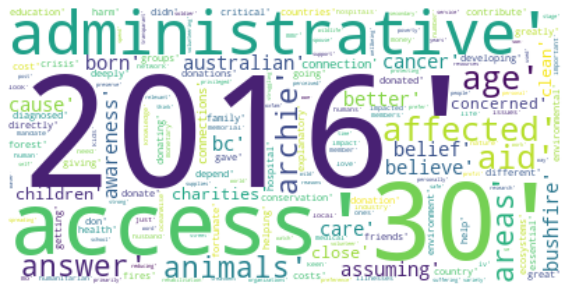

1


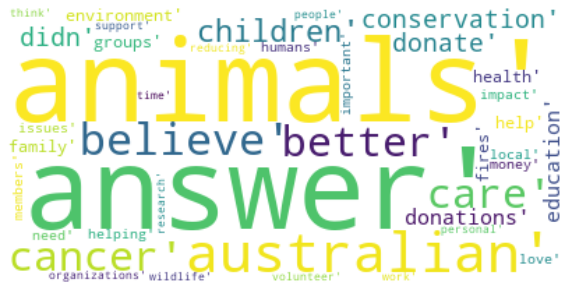

2


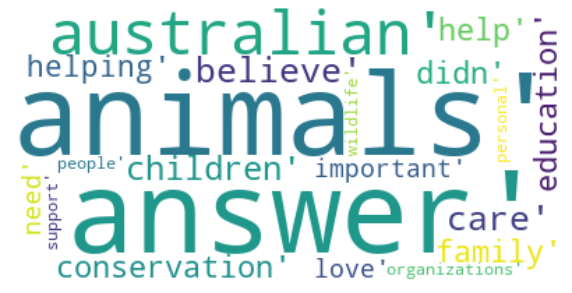

3


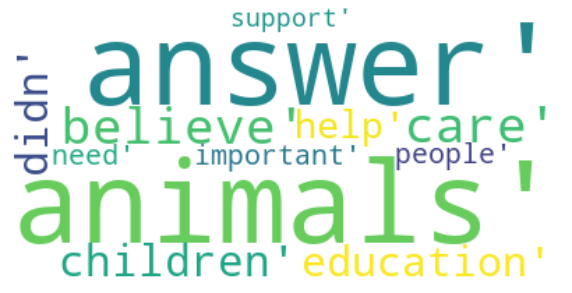

4


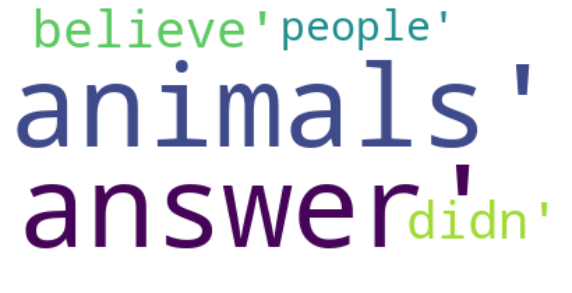

5


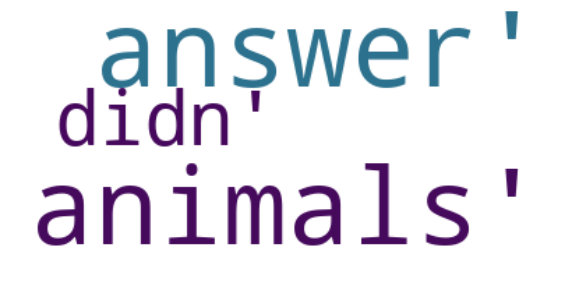

6


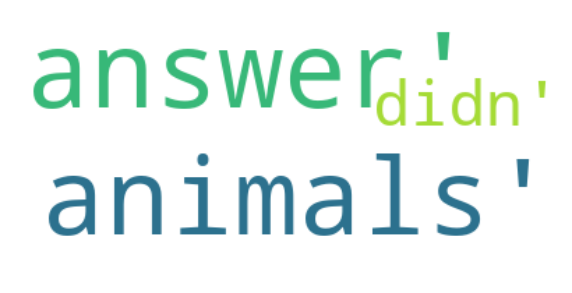

7


In [97]:
for i in np.arange(1,8,1):
    reviews = cluster_1["Can you share why you donated to that specific charity/cause?"]
    tfidf = TfidfVectorizer(min_df= i,stop_words="english").fit(reviews)
    data_positive = tfidf.transform(reviews)
    my_df2 = pd.DataFrame(columns=tfidf.get_feature_names(), data=data_positive.toarray())
    text = tfidf.get_feature_names()
    wordcloud = WordCloud(background_color="white").generate(str(text))
    plt.figure(figsize = (10.0,8.0))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()
    print(i)

## MODEL

In [ ]:
# Can we predict what respondents are aware of MMR?

In [116]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [104]:
survey.columns = ['Respondent ID', 'Collector ID', 'Start Date', 'End Date', 'IP Address',
       'Have you heard of the Marine Mammal Rescue Centre (MMR)?',
       'How did you hear about the MMR?', 'Other (please specify)',
       'On a scale of 1-5 with 1 being negative and 5 being positive, how do you feel about the Marine Mammal Rescue Centre’s services?',
       'Please explain why you chose your selected ranking?',
       'Please describe what a marine mammal in distress looks like to you?',
       'How confident do you feel that you know what to do when you come across a marine mammal in distress?',
       'Please state what actions you would take if you came across a marine mammal in distress. (Rank your choices with 1 being the best).  Feed the mammal shellfish',
       'Don’t do anything, let nature take its course',
       'Call MMR, the Vancouver Aquarium, or a local rehabilitation centre',
       'Take it home and care for it', 'Keep people and pets away',
       'Take the mammal to the nearest veterinary clinic',
       'Have you donated to a charity in the past year?',
       "What type of charity/cause have you most frequently donated to in the past year?",
       'Other (please specify).1',
       'Can you share why you donated to that specific charity/cause?',
       'How did you find out about that specific charity/cause?',
       'Other (please specify).2', 'How do you prefer to make your donations?',
       'Other (please specify).3',
       'Have you considered donating money to the Marine Mammal Rescue Center?',
       'Have you considered donating money to ocean health and conservation causes?',
       'City/Town', 'State/Province', 'Country', 'What is your age?',
       'What is the highest level of education achieved?',
       'Do you have an affiliation to MMR?',
       'Do you have an affiliation to the Vancouver Aquarium?',
       'Other (please specify).4',
       'If you would like to be entered into a random draw for two general admission passes to the Vancouver Aquarium, please share your email address:',
       'clusters']

In [148]:
survey_ready = survey[['Have you heard of the Marine Mammal Rescue Centre (MMR)?',
       'Please state what actions you would take if you came across a marine mammal in distress. (Rank your choices with 1 being the best).  Feed the mammal shellfish',
       'Don’t do anything, let nature take its course',
       'Call MMR, the Vancouver Aquarium, or a local rehabilitation centre',
       'Take it home and care for it', 'Keep people and pets away',
       'Take the mammal to the nearest veterinary clinic',
       'Have you donated to a charity in the past year?',
       "What type of charity/cause have you most frequently donated to in the past year?",
       'How did you find out about that specific charity/cause?',
        'How do you prefer to make your donations?',
       'Have you considered donating money to the Marine Mammal Rescue Center?',
       'Have you considered donating money to ocean health and conservation causes?',
       'City/Town', 'State/Province', 'Country', 'What is your age?',
       'What is the highest level of education achieved?',
       'Do you have an affiliation to MMR?',
       'Do you have an affiliation to the Vancouver Aquarium?', "clusters"]].copy()

In [149]:
mmr = pd.get_dummies(survey_ready, drop_first = True)

In [150]:
mmr.shape

(139, 132)

In [151]:
mmr.head()

Please state what actions you would take if you came across a marine mammal in distress. (Rank your choices with 1 being the best).  Feed the mammal shellfish  \
0                                                  0                                                                                                                
1                                                  4                                                                                                                
2                                                  0                                                                                                                
3                                                  0                                                                                                                
4                                                  5                                                                                                                

   Don’t do anything, let nature take its course  \
0                                              0   
1                                              5   
2                                              0   
3                                              0   
4                                              4   

   Call MMR, the Vancouver Aquarium, or a local rehabilitation centre  \
0                                                  1                    
1                                                  1                    
2                                                  1                    
3                                                  0                    
4                                                  1                    

   Take it home and care for it  Keep people and pets away  \
0                             0                          2   
1                             6                          2   
2                             0                          2   
3                             0                          0   
4                             6                          3   

   Take the mammal to the nearest veterinary clinic  clusters  \
0                                                 0         1   
1                                                 3         1   
2                                                 0         1   
3                                                 0         0   
4                                                 2         0   

   Have you heard of the Marine Mammal Rescue Centre (MMR)?_Yes  \
0                                                  1              
1                                                  1              
2                                                  1              
3                                                  1              
4                                                  0              

   Have you donated to a charity in the past year?_Yes  \
0                                                  1     
1                                                  1     
2                                                  1     
3                                                  1     
4                                                  0     

   What type of charity/cause have you most frequently donated to in the past year?_Didn't answer it  \
0                                                  0                                                   
1                                                  0                                                   
2                                                  0                                                   
3                                                  0                                                   
4                                                  1                                                   

   ...  \
0  ...   
1  ...   
2  ...   
3  ...   
4  ...   

   What is the highest level of education achieved?_Less t

In [152]:
target = mmr["Have you heard of the Marine Mammal Rescue Centre (MMR)?_Yes"].copy()

In [153]:
mmr.drop("Have you heard of the Marine Mammal Rescue Centre (MMR)?_Yes", axis = 1, inplace = True)

In [154]:
mmr["Have you heard of the Marine Mammal Rescue Centre (MMR)?_Yes"] = target

In [155]:
# Splitting the data
X = mmr.iloc[:,0:130]
y = mmr.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [156]:
LR_model = LogisticRegression()
LR_model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [157]:
print(f"LR training set accuracy: {LR_model.score(X_train, y_train)}")

LR training set accuracy: 0.9690721649484536


In [159]:
print(f"LR test set accuracy: {LR_model.score(X_test, y_test)}")

LR test set accuracy: 0.7857142857142857


In [160]:
coef_dict = {}
for coef, feat in zip(LR_model.coef_[0,:],X_train.columns):
    coef_dict[feat] = coef

In [161]:
coefficients = pd.DataFrame.from_dict(coef_dict,orient='index')
coefficents = coefficients.reset_index()
coefficents.columns = ["Feature", "Coefficient"]
coefficents.sort_values(by = "Coefficient", ascending = False)

Feature  Coefficient
33   Have you considered donating money to the Mari...     1.077879
114                            What is your age?_50-64     0.977490
6                                             clusters     0.830427
115                              What is your age?_65+     0.772791
64                            City/Town_Port coquitlam     0.642461
..                                                 ...          ...
124              Do you have an affiliation to MMR?_No    -0.547595
117                         What is your age?_Under 25    -0.583692
9    What type of charity/cause have you most frequ...    -0.688867
31   Have you considered donating money to the Mari...    -0.781129
128  Do you have an affiliation to the Vancouver Aq...    -0.933729

[130 rows x 2 columns]

In [166]:
y_pred = LR_model.predict(X_test)

In [167]:
from sklearn.metrics import confusion_matrix

con_mat = confusion_matrix(y_test,y_pred)
con_mat

array([[ 8,  7],
       [ 2, 25]], dtype=int64)

In [168]:
df_con_mat = pd.DataFrame(con_mat, columns = ['Predicted 0','Predicted 1'],
                 index = ['True 0','True 1'])

df_con_mat

Predicted 0  Predicted 1
True 0            8            7
True 1            2           25

In [170]:
# model is failing to predict respondents that haven't heard of MMR
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.53      0.64        15
           1       0.78      0.93      0.85        27

    accuracy                           0.79        42
   macro avg       0.79      0.73      0.74        42
weighted avg       0.79      0.79      0.77        42



In [175]:
DT_model = DecisionTreeClassifier(max_depth=3)
DT_model.fit(X_train, y_train)


print(f"DT training set accuracy: {DT_model.score(X_train, y_train)}")

DT training set accuracy: 0.8865979381443299


In [176]:
DT_model.score(X_test,y_test)

0.6904761904761905

In [177]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

C:\Users\gisel\anaconda3\envs\deeplearning\lib\site-packages\sklearn\externals\six.py:31: FutureWarning:

The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).



In [180]:
import os

os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

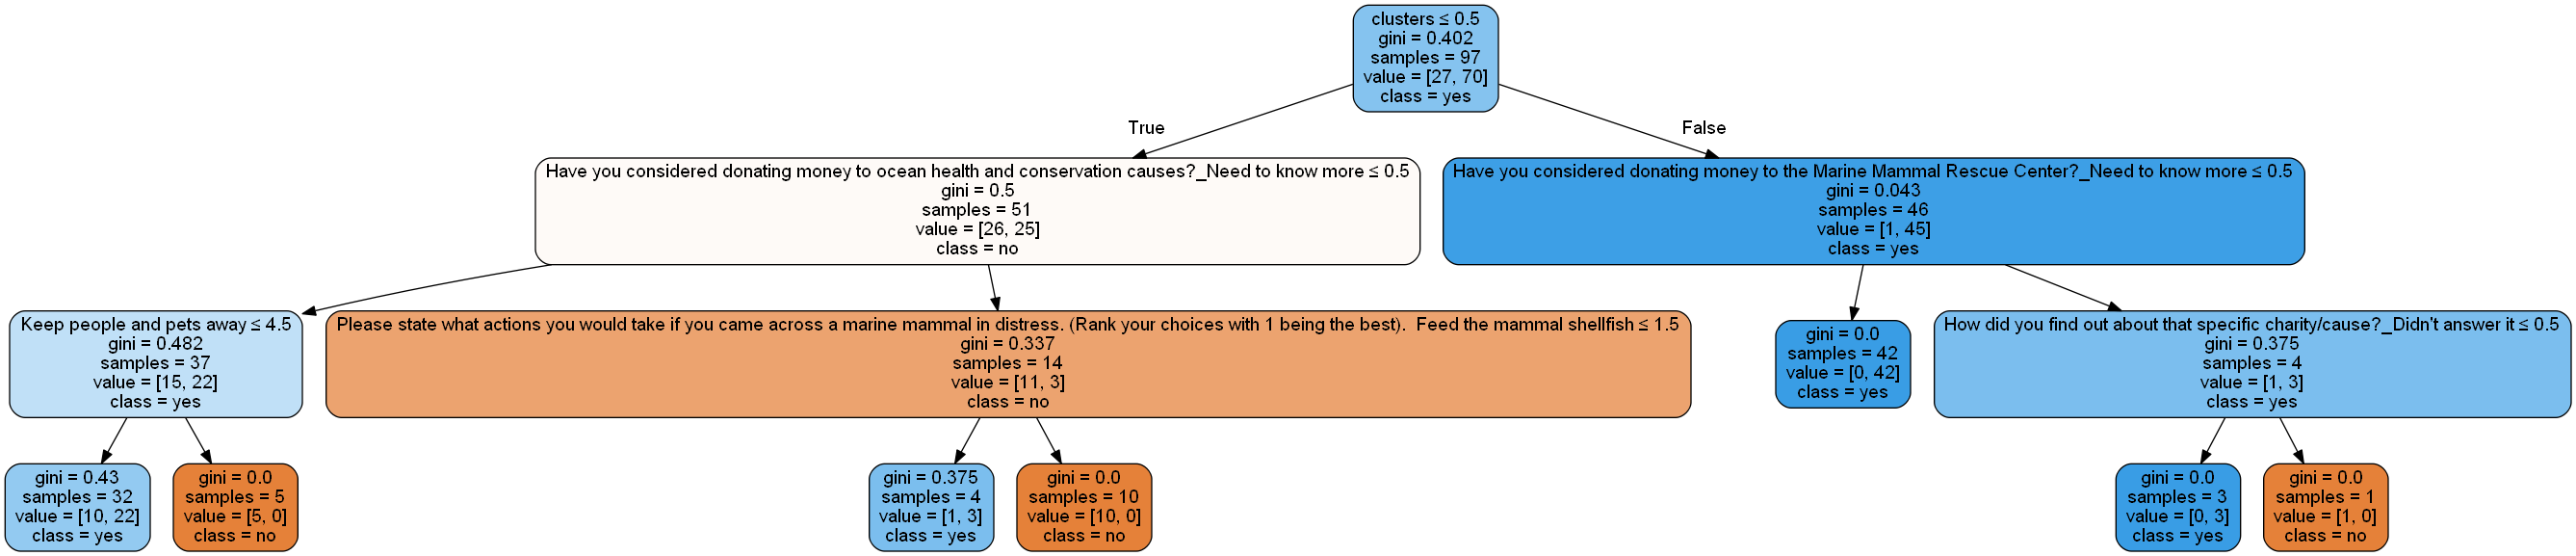

In [182]:
import sklearn.tree as tree
import pydotplus
from sklearn.externals.six import StringIO 
from IPython.display import Image
dic = {0: "no", 1 : "yes"}

dot_data = StringIO()
tree.export_graphviz(DT_model, 
 out_file=dot_data, 
 class_names=dic,
feature_names = list(X.columns),                     
 filled=True, 
 rounded=True, 
 special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
Image(graph.create_png())